<a href="https://colab.research.google.com/github/IvanStukalov/MLTechnologies/blob/lab_5/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 5. Ансамбли моделей машинного обучения. Часть 1.

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from IPython.display import Image
import pandas as pd
import graphviz
import pydotplus
from io import StringIO
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

In [113]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

### Выберите набор данных (датасет) для решения задачи классификации или регресии.

In [131]:
# Используем датасет iris с двумя первыми признаками
iris = load_iris()
iris_X = iris.data[:, :2]
iris_y = iris.target

### С использованием метода train_test_split разделите выборку на обучающую и тестовую.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.2, random_state=1)

### Бэггинг

In [133]:
# Обучим классификатор на 5 деревьях
bg = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bg.fit(iris_X, iris_y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)

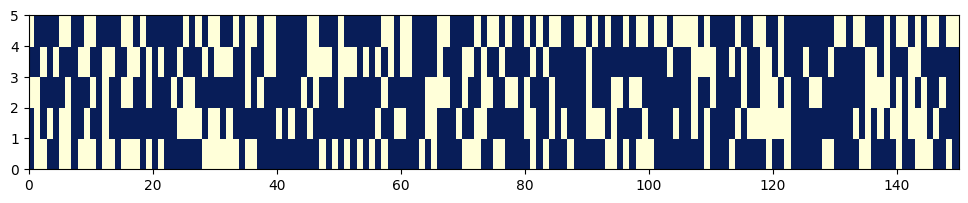

In [134]:
# Сконвертируем эти данные в двоичную матрицу,
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, iris_X.shape[0]))
for i in range(5):
    for j in bg.estimators_samples_[i]:
        bin_array[i][j] = 1

fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [135]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bg.oob_score_, 1-bg.oob_score_

(0.6933333333333334, 0.30666666666666664)

In [136]:
# точность предсказания
bagging_pred = bg.predict(X_test)
accuracy_score(y_test,bagging_pred)

0.8666666666666667

### Случайный лес

In [137]:
# Обучим классификатор на 5 деревьях
tree1 = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)
tree1.fit(iris_X, iris_y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)

In [138]:
rf_pred = tree1.predict(X_test)

In [139]:
# Точность
accuracy_score(y_test,rf_pred)

0.9

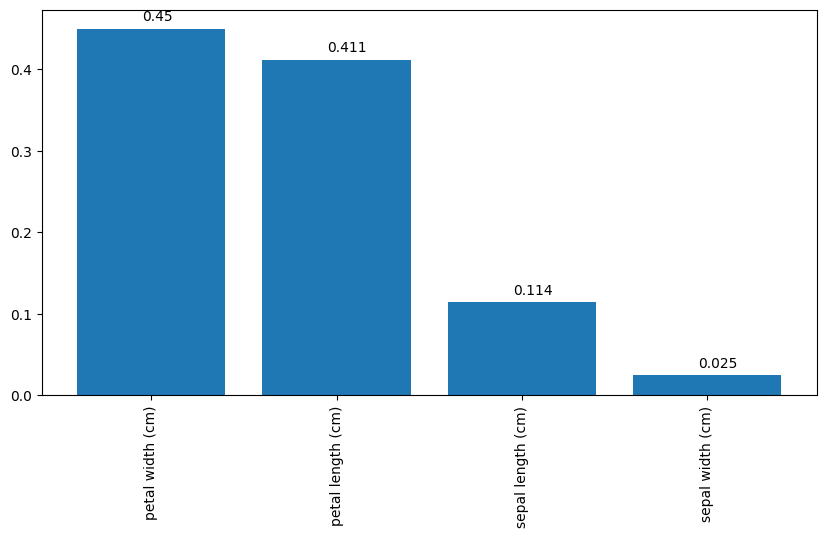

In [140]:
# Важность признаков
iris_x_ds = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_rf_cl = RandomForestClassifier(random_state=1)
iris_rf_cl.fit(iris_x_ds, iris.target)
_,_ = draw_feature_importances(iris_rf_cl, iris_x_ds)

### AdaBoost

In [154]:
# Используем датасет iris с двумя первыми признаками
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.2, random_state=1)

# Обучим классификатор на 5 деревьях
ab1 = AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10)
ab1.fit(iris_X, iris_y)

AdaBoostClassifier(algorithm='SAMME', n_estimators=5, random_state=10)

In [156]:
ada_pred = ab1.predict(X_test)

In [157]:
# Точность
accuracy_score(y_test,ada_pred)

0.9666666666666667

### Градиентный бустинг

In [151]:
# Используем датасет iris с двумя первыми признаками
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.2, random_state=1)

# Обучим классификатор на 5 деревьях
bc1 = GradientBoostingClassifier(random_state=10)
bc1.fit(X_train, y_train)

GradientBoostingClassifier(random_state=10)

In [152]:
boosting_pred = bc1.predict(X_test)

In [153]:
accuracy_score(y_test,boosting_pred)

0.9666666666666667